<a href="https://colab.research.google.com/github/toanchitran/CoderSchool_ML_IZU/blob/master/WeeklyProject_Team_5_Global_Terrorism_Alec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team 5 - Global Terrorism

![](https://static.euronews.com/articles/stories/04/44/85/80/1440x810_cmsv2_42163f70-0149-51fc-91a2-6608636a809b-4448580.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/START-UMD/gtd)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository.
- Submit your works through Google Form (Link on Learning Portal)

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
PATH_TO_DATA = '/content/drive/MyDrive/Coder School/Week 3/Week 3 project/Copy of terrorism.csv'

In [ ]:
import pandas as pd
dataframe = pd.read_csv(PATH_TO_DATA, encoding='ISO-8859-1')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
drop_col = ['approxdate', 'specificity','vicinity','location', 'doubtterr', 'alternative', 'alternative_txt', 'attacktype1','attacktype2', 'attacktype2_txt','attacktype3', 'attacktype3_txt'
,'targtype1', 'targsubtype1', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'natlty1', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt',
'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'guncertain2', 'guncertain3', 'claimmode', 'claim2', 'claimmode2', 'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt','compclaim', 'weaptype1', 'weapsubtype1', 'weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt','weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt','weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt', 'weapdetail', 'divert', 'kidhijcountry', 'ransomamtus', 'ransompaidus', 'ransomnote', 'addnotes', 'scite1', 'scite2', 'scite3',
 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'related', 'dbsource']

In [ ]:
terrorism_df = dataframe.drop(columns=drop_col)

In [ ]:
terrorism_df.rename(columns = {'iyear':'year',
                               'imonth':'month',
                               'iday':'day',
                               'resolution':'resolution_date',
                               'provstate':'province',
                               'multiple':'multiple_incident',
                               'success':'successful_attack',
                               'attacktype1_txt':'attack_type',
                               'targtype1_txt':'target_type',
                               'targsubtype1_txt':'target_subtype',
                               'corp1':'target_entity',
                               'target1':'target',
                               'natlty1_txt':'target_nationality',
                               'gname':'attacker',
                               'guncertain1':'attacker_uncertain',
                               'individual':'lone_wolf',
                               'nperps':'attacker_num',
                               'nperpcap':'captured_num',
                               'weaptype1_txt':'weapon_type',
                               'weapsubtype1_txt':'weapon_subtype',
                               'nkill':'fatality_num',
                               'nkillus':'US_fatality_num',
                               'nkillter':'attacker_fatality_num',
                               'nwound':'wounded_num',
                               'nwoundus':'US_wounded_num',
                               'nwoundte':'attacker_wounded_num',
                               'property':'property_damage',
                               'propextent':'property_damage_ext',
                               'propvalue':'property_damage_USD',
                               'ishostkid':'hostage',
                               'nhostkid':'hostage_num',
                               'nhostkidus':'US_hostage_num',
                               'nhours':'hostage_hours',
                               'ndays':'hostage_days',
                               'ransom':'ransom_demand',
                               'ransomamt':'ransom_demand_USD',
                               'ransompaid':'ransom_paid',
                               'hostkidoutcome':'hostage_outcome',
                               'hostkidoutcome_txt':'hostage_outcome_txt',
                               'nreleased':'hostage_survived_num',
                               'INT_ANY':'international_attack'
                               }, inplace = True)

## Hostage Incidents


### Hostage incidents compared to all incidents



In [ ]:
# make a new df containing only incidents involving hostages

hostage_incident_df = terrorism_df[(terrorism_df['hostage'] == 1) | (terrorism_df['attack_type'] == 4) | (terrorism_df['attack_type'] == 5) | (terrorism_df['attack_type'] == 6)].reset_index()

In [ ]:
# proportion of total attacks that involve hostage taking

hostage_incidents = len(hostage_incident_df)
non_hostage_incidents = len(terrorism_df) - hostage_incidents

hostage_incidents_ransom = (hostage_incident_df['ransom_demand'] == 1).sum()
hostage_incidents_non_ransom = hostage_incidents - hostage_incidents_ransom 

ransom_paid = (hostage_incident_df['ransom_paid'] > 0).sum()
no_ransom_paid = hostage_incidents_ransom - ransom_paid

print(f"non hostage incidents: {non_hostage_incidents} hostage incidents: {hostage_incidents}, no ransom: {hostage_incidents_non_ransom}, ransom: {hostage_incidents_ransom}, not paid: {no_ransom_paid}, paid: {ransom_paid} ")


non hostage incidents: 168119 hostage incidents: 13572, no ransom: 12312, ransom: 1260, not paid: 1055, paid: 205 


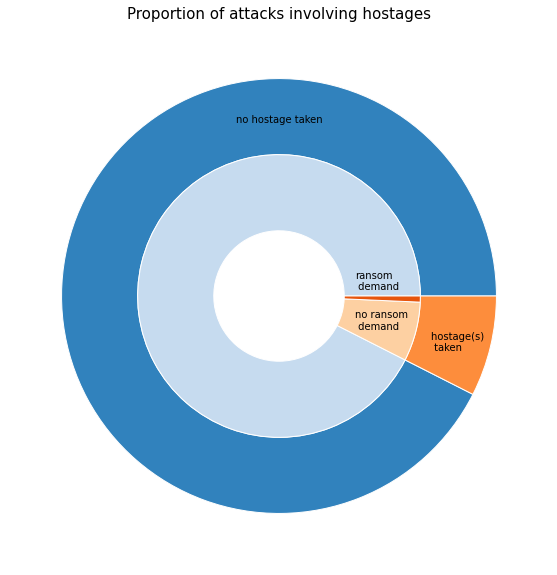

In [ ]:
# plot a nested pie chart

group1 = [non_hostage_incidents, hostage_incidents]
group2 = [non_hostage_incidents, hostage_incidents_non_ransom, hostage_incidents_ransom]


fig, ax = plt.subplots(figsize=(10, 10))
size = 0.35

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(2)*5)
inner_colors = cmap([3, 7, 4])

ax.pie(group1, radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(group2, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labeldistance=1.5)


ax.annotate( 'no hostage taken', (-0.2, 0.8))
ax.annotate( 'hostage(s) \n taken', (0.7, -0.25))
ax.annotate( 'ransom\n demand', (0.35, 0.03))
ax.annotate( 'no ransom \n demand', (0.35, -0.15))

ax.set_title('Proportion of attacks involving hostages', fontsize=15)



plt.show()

A significant portion of terrorist attacks do not involve hostage taking.

A significant portion of hostage incidents do not demand ransom.

### Are hostage incidents increasing and which countries take the most hostages?

In [ ]:
total_hostage_incidents_20 = hostage_incident_df.groupby('year')['eventid'].count().tail(20).tolist()
years = hostage_incident_df['year'].unique()[-20:]

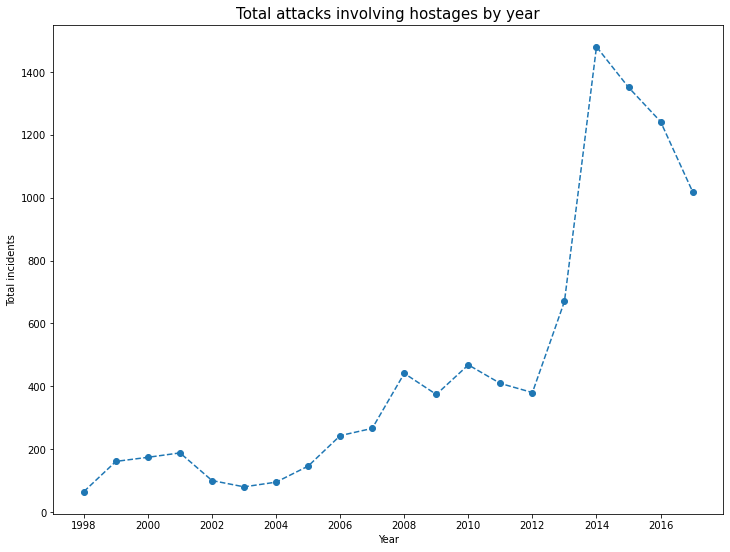

In [ ]:
fig, ax = plt.subplots(figsize=(12,9))

ax.plot(years, total_hostage_incidents_20, '--o')
ax.set(xticks=range(years[0], years[-1], 2),
       xlabel='Year', 
       ylabel='Total incidents', 
       )

ax.set_title('Total attacks involving hostages by year', fontsize=15)


plt.show()

Hostage incidents have risen cosiderably in the last 20 years, with a big spike in 2014.

A closer look at the last 10 years:

In [ ]:
# top countries where hostage incidents take place
top_hostage_takers_fatality = hostage_incident_df.loc[(hostage_incident_df['hostage_outcome'] == 4) & (hostage_incident_df['year'] > 2007)].groupby('country_txt')['eventid'].count().sort_values(ascending=False).head(20)
top_hostage_takers_non_fatality = hostage_incident_df.loc[(hostage_incident_df['hostage_outcome'] != 4) & (hostage_incident_df['year'] > 2007)].groupby('country_txt')['eventid'].count().sort_values(ascending=False).head(20)

In [ ]:
top_hostage_takers = pd.merge(top_hostage_takers_non_fatality, top_hostage_takers_fatality, on='country_txt').reset_index().head(10)
top_hostage_takers = top_hostage_takers.rename(columns={'eventid_x':'total_non_fatal',
                                                        'eventid_y':'total_fatal'})

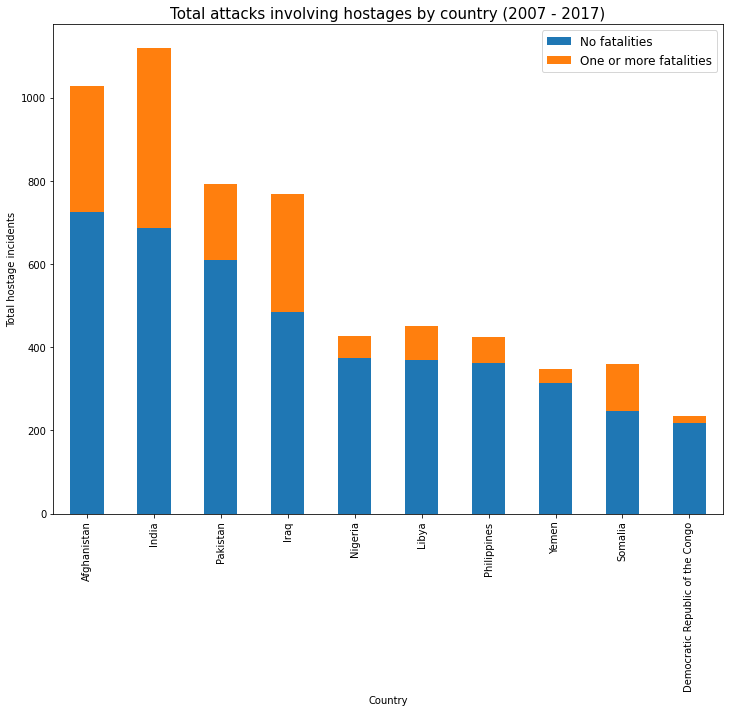

In [ ]:
fig, ax = plt.subplots(figsize=(12,9))

top_hostage_takers.plot.bar(x='country_txt', stacked=True, ax=ax)

ax.set(xlabel='Country', 
       ylabel='Total hostage incidents', 
       )

ax.set_title('Total attacks involving hostages by country (2007 - 2017)', fontsize=15)
ax.legend(['No fatalities', 'One or more fatalities'], fontsize=12)

plt.show()

The chances of survival in the countries that take the most captives during terrorist incidents very much depends on which country you are taken in. 

### Hostage incidents and ransom

In [ ]:
top_ransom_demander_fatality = hostage_incident_df.loc[(hostage_incident_df['hostage_outcome'] == 4) & (hostage_incident_df['year'] > 2007) & (hostage_incident_df['ransom_demand'] == 1)].groupby('attacker')['eventid'].count().sort_values(ascending=False).head(20)
top_ransom_demander_non_fatality = hostage_incident_df.loc[(hostage_incident_df['hostage_outcome'] != 4) & (hostage_incident_df['year'] > 2007) & (hostage_incident_df['ransom_demand'] == 1)].groupby('attacker')['eventid'].count().sort_values(ascending=False).head(20)

In [ ]:
top_ransom_demander = pd.merge(top_ransom_demander_non_fatality, top_ransom_demander_fatality, on='attacker').reset_index().head(5)
top_ransom_demander = top_ransom_demander.rename(columns={'eventid_x':'total_non_fatal',
                                                         'eventid_y':'total_fatal'})

In [ ]:
top_ransom_demander_nat_fatality = hostage_incident_df.loc[(hostage_incident_df['hostage_outcome'] == 4) & (hostage_incident_df['year'] > 2007) & (hostage_incident_df['ransom_demand'] == 1)].groupby('target_nationality')['eventid'].count().sort_values(ascending=False).head(20)
top_ransom_demander_nat_non_fatality = hostage_incident_df.loc[(hostage_incident_df['hostage_outcome'] != 4) & (hostage_incident_df['year'] > 2007) & (hostage_incident_df['ransom_demand'] == 1)].groupby('target_nationality')['eventid'].count().sort_values(ascending=False).head(20)

In [ ]:
top_ransom_demander_nat = pd.merge(top_ransom_demander_nat_non_fatality, top_ransom_demander_nat_fatality, on='target_nationality').reset_index().head(5)
top_ransom_demander_nat = top_ransom_demander_nat.rename(columns={'eventid_x':'total_non_fatal',
                                                         'eventid_y':'total_fatal'})

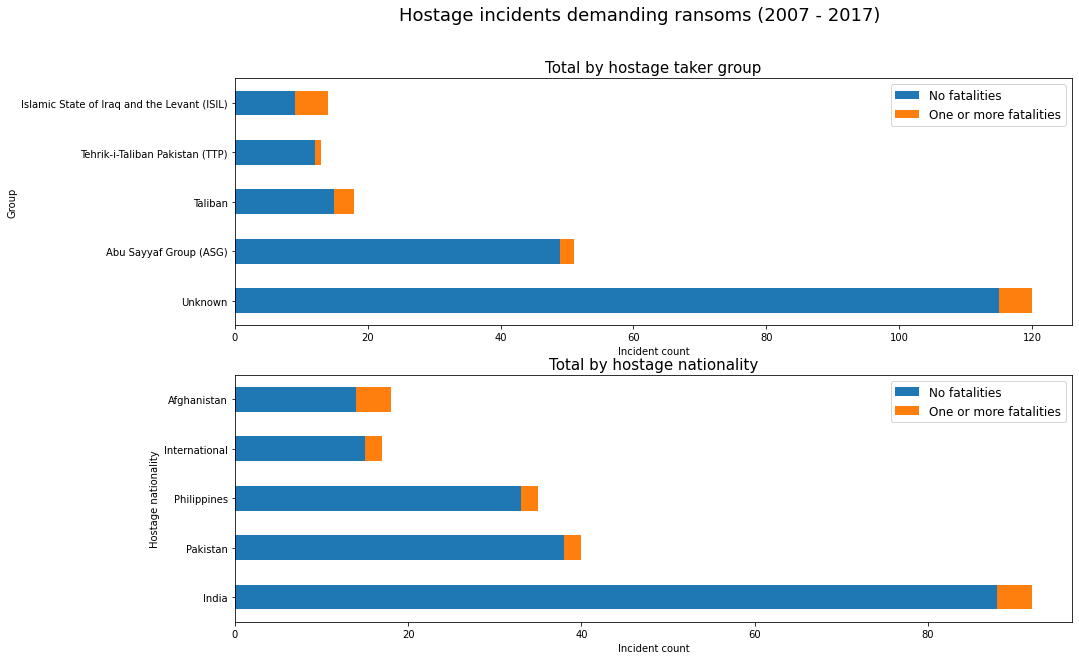

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
fig.suptitle("Hostage incidents demanding ransoms (2007 - 2017)", fontsize=18)

top_ransom_demander.plot(x='attacker', kind='barh', ax=axes[0], stacked=True)
axes[0].set_title("Total by hostage taker group", fontsize=15)
axes[0].set_xlabel('Incident count')
axes[0].set_ylabel('Group')
axes[0].legend(['No fatalities', 'One or more fatalities'], fontsize=12)


top_ransom_demander_nat.plot(x='target_nationality', kind='barh', ax=axes[1], stacked=True)
axes[1].set_title("Total by hostage nationality", fontsize=15)
axes[1].set_xlabel('Incident count')
axes[1].set_ylabel('Hostage nationality')
axes[1].legend(['No fatalities', 'One or more fatalities'], fontsize=12)


plt.show()

### How much ransom money is demanded/paid?

In [ ]:
# list of ransom demands after dropping NA and values listed as 0
ransom_demand_USD_df = hostage_incident_df[['eventid', 'year', 'target','month', 'day', 'attacker','hostage_num', 'hostage_hours', 'hostage_days', 'ransom_demand_USD', 'ransom_paid', 'hostage_outcome','hostage_survived_num']]
ransom_demand_USD_df = ransom_demand_USD_df[(ransom_demand_USD_df['ransom_demand_USD'] != -99) & (ransom_demand_USD_df['ransom_demand_USD'] > 0)]
ransom_paid_USD_df = ransom_demand_USD_df.loc[ransom_demand_USD_df['ransom_paid'] > 0]

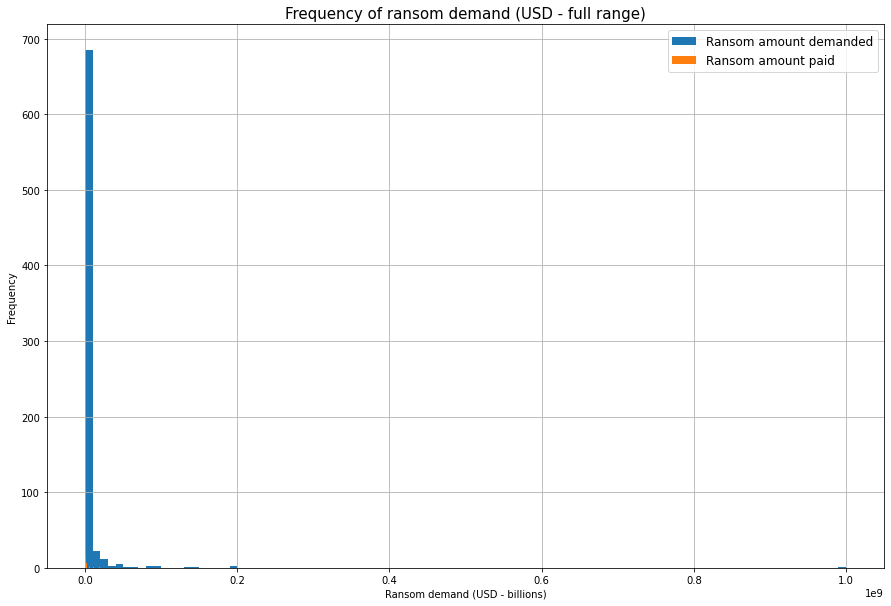

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

ransom_demand_USD_df.hist(column='ransom_demand_USD', bins = 100, ax=ax)
ransom_paid_USD_df.hist(column='ransom_paid', bins = 100, ax=ax)

ax.set_title('Frequency of ransom demand (USD - full range)', size=15)
ax.set_xlabel('Ransom demand (USD - billions)')
ax.set_ylabel('Frequency')

ax.legend(['Ransom amount demanded', 'Ransom amount paid'], fontsize=12)


plt.show()

Histogram is skewed by one rogue request for USD $1,000,000,000, by:

In [ ]:
terrorism_df.loc[terrorism_df['ransom_demand_USD'].idxmax()][['attacker', 'year', 'country_txt','target', 'ransom_demand_USD']]

attacker                                    Red Brigades
year                                                1978
country_txt                                        Italy
target               Aldo Moro, former premier president
ransom_demand_USD                                  1e+09
Name: 6130, dtype: object

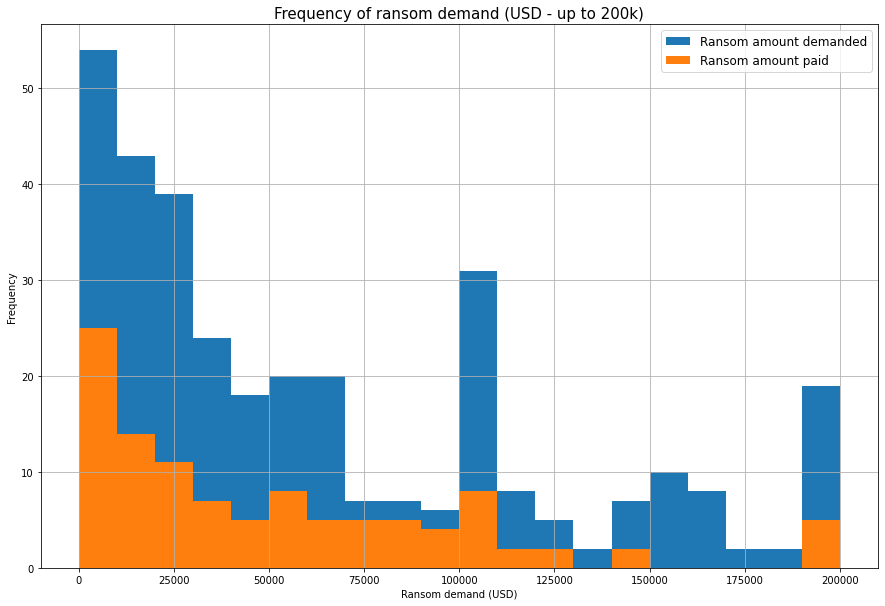

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

ransom_demand_USD_df.hist(column='ransom_demand_USD', bins = 20, range=[0,200000], ax=ax)
ransom_paid_USD_df.hist(column='ransom_paid', range=[0,200000], bins = 20, ax=ax)

ax.set_title('Frequency of ransom demand (USD - up to 200k)', size=15)
ax.set_xlabel('Ransom demand (USD)')
ax.set_ylabel('Frequency')

ax.legend(['Ransom amount demanded', 'Ransom amount paid'], fontsize=12)


plt.show()

Typically, most ransom demands are below USD $75,000. 

However, the amount actually paid to the abductees is typically lower and less frequent. 

### Does paying less than the requested amount of ransom decrease the chances of a successful release (no hostages killed)?



In [ ]:
ransom_paid_USD_df['hostage_killed_num'] = ransom_paid_USD_df['hostage_num'] - ransom_paid_USD_df['hostage_survived_num']
ransom_paid_USD_df['hostage_killed'] = ransom_paid_USD_df['hostage_killed_num'].apply(lambda x: 'r' if x > 0 else 'g')

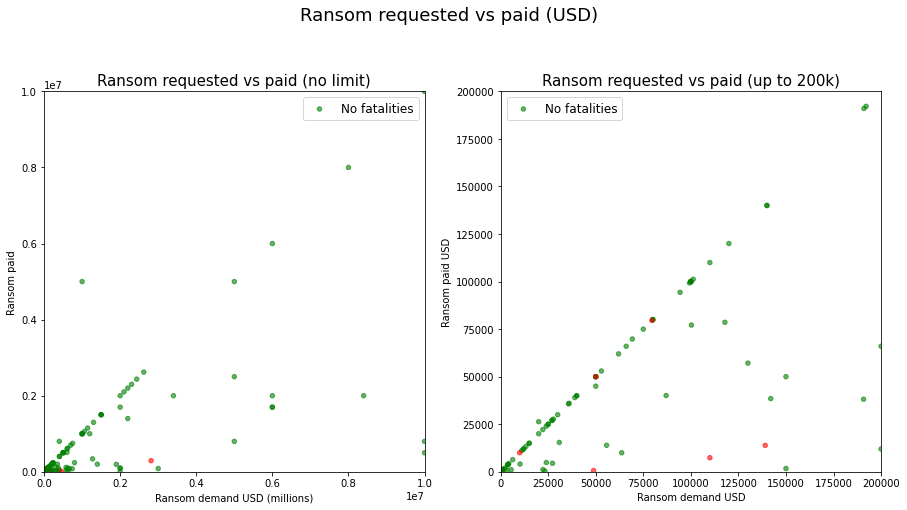

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Ransom requested vs paid (USD)', fontsize=18)

ransom_paid_USD_df.plot.scatter('ransom_demand_USD', 'ransom_paid', c='hostage_killed', alpha=0.6, ax=axes[0])

axes[0].set_title('Ransom requested vs paid (no limit)', size=15)
axes[0].set_xlabel('Ransom demand USD (millions)')
axes[0].set_ylabel('Ransom paid')
axes[0].set_xlim([0, 10000000])
axes[0].set_ylim([0, 10000000])
axes[0].set_aspect('equal', 'box')
axes[0].legend(['No fatalities', 'One or more fatalities'], fontsize=12)


ransom_paid_USD_df.plot.scatter('ransom_demand_USD', 'ransom_paid', c='hostage_killed', alpha=0.6, ax=axes[1])

axes[1].set_title('Ransom requested vs paid (up to 200k)', size=15)
axes[1].set_xlabel('Ransom demand USD')
axes[1].set_ylabel('Ransom paid USD')
axes[1].set_xlim([0, 200000])
axes[1].set_ylim([0, 200000])
axes[1].set_aspect('equal', 'box')
axes[1].legend(['No fatalities', 'One or more fatalities'], fontsize=12)


plt.show()

In cases where ransom was demanded and paid, most demands were met. 

A handful of cases paid under the requested amount, and one case paid more. 

There doesn't seem to be a correlation between meeting the reqested amount and a successful outcome: hostages died when demands were met, and when they weren't. 

### What happens if you don't pay?

In [ ]:
ransom_not_paid = hostage_incident_df[(hostage_incident_df['ransom_demand_USD'] > 0) & (hostage_incident_df['ransom_paid'] == 0)]
ransom_not_paid['hostage_killed_num'] = ransom_not_paid['hostage_num'] - ransom_not_paid['hostage_survived_num']

In [ ]:
hostages_killed_per_incident_ransom_not_paid = (ransom_not_paid['hostage_killed_num'].count() / len(hostage_incident_df)) * 100

In [ ]:
print(f"Chance of death in a hostage incident if the ransom isn't paid is {round(hostages_killed_per_incident_ransom_not_paid, 2)}%.")

Chance of death in a hostage incident if the ransom isn't paid is 1.1%.


In [ ]:
hostages_killed_per_incident_ransom_paid = (ransom_paid_USD_df['hostage_killed_num'].count() / len(hostage_incident_df)) * 100

In [ ]:
print(f"Chance of death in a hostage incident if the ransom isn't paid is {round(hostages_killed_per_incident_ransom_paid, 2)}%.")

Chance of death in a hostage incident if the ransom isn't paid is 1.08%.


The chances of a death in a hostage incident are quite low, regardless of ransom paid or not. 

### Caveat

Ransom data in this dataset was scant (~250 entries contained ransom dollar amounts of a dataset of ~180k rows). 

This is likely because when ransoms are paid, the payer (whether a government, corp or individual) is unlikely to, or discouraged from, publicising the act as to deter other hostage-takers. 

###Hostage indicents and length of incident

In [ ]:
# drop rows where hostage_hours or hostage_days == -99
hostage_incident_df = hostage_incident_df[(hostage_incident_df['hostage_hours'] != -99) & (hostage_incident_df['hostage_days'] != -99)]

# create new row for total incident time
hostage_incident_df['total_hostage_time'] = hostage_incident_df['hostage_hours'] + (hostage_incident_df['hostage_days'] * 24)

In [ ]:
# drop all rows where total_hostage_time & hostage_outcome is NaN
hostage_incident_df_dropna = hostage_incident_df.dropna(how='any',subset=['total_hostage_time', 'hostage_outcome', 'hostage_num', 'hostage_survived_num']).reset_index()

In [ ]:
# drop all rows where hostage_num and hostage_survived_num = '-99' and more hostages survived than were taken
hostage_incident_df_dropna = hostage_incident_df_dropna[(hostage_incident_df_dropna['hostage_num'] != -99) & (hostage_incident_df_dropna['hostage_survived_num'] != -99)]
hostage_incident_df_dropna['num_hostage_killed'] = hostage_incident_df_dropna['hostage_num'] - hostage_incident_df_dropna['hostage_survived_num']
#hostage_incident_df_dropna = hostage_incident_df_dropna[(hostage_incident_df_dropna['num_hostage_killed'] < 0)]
hostage_incident_df_dropna.shape

(726, 64)

In [ ]:
# series for one or more fatalities
hostage_killed = (hostage_incident_df_dropna['hostage_outcome'] == 4)
hostage_killed.value_counts()

False    635
True      91
Name: hostage_outcome, dtype: int64

In [ ]:
# series for incident length
incident_length = hostage_incident_df_dropna['total_hostage_time']

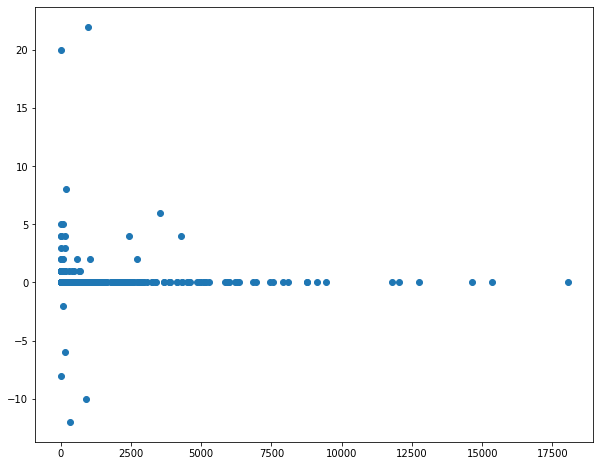

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(incident_length, num_hostage_killed)
plt.show()

In [ ]:
hostage_incident_df_dropna[(hostage_incident_df_dropna['hostage_num'] - hostage_incident_df_dropna['hostage_survived_num']) < 0]